In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [274]:
sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]
def mvstd(x):
  n=len(x)
  mean=sum(x)/n
  var=sum((xi - mean) ** 2 for xi in x) / (n-1)
  std=var**0.5
  return (mean, var, std)

print(mvstd(sales))

(3052.714285714286, 214387.90476190473, 463.0204150595357)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [275]:
cust=[127, 80, 105, 92, 120, 115, 93]
print(f'covariance of sales is {np.cov(sales, ddof=1)}')
print(f'covariance of customers is {np.cov(cust, ddof=1)}')
print('')
print(np.cov(sales, cust, ddof=1))

covariance of sales is 214387.90476190473
covariance of customers is 290.95238095238096

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


In [276]:
lastweek={'sales':sales, 'customers':cust}
df=pd.DataFrame(lastweek)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [277]:
print(mvstd(sales)[2])

463.0204150595357


In [279]:
print(np.std(sales, ddof=1))

463.0204150595357


In [291]:
# this is the part i don't understand
(np.cov(sales, cust, ddof=1))/(np.std(sales, ddof=1)*np.std(cust, ddof=1))

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [286]:
np.corrcoef(sales, cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [282]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [134]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [135]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

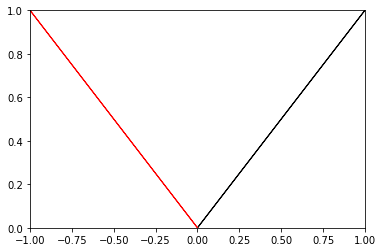

...a synonym for orthogonal is "perpendicular".


In [140]:
plt.xlim(-1,1)
plt.arrow(0,0,1,1)
plt.arrow(0,0,-1,1, color='red')
plt.show()
print('...a synonym for orthogonal is \"perpendicular\".')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [148]:
# "...vectors are orthogonal if their dot product equals zero."
a=np.array([[-5],
            [3],
            [7]])
b=np.array([[6],
            [-8],
            [2]])

(a*b).sum()

-40

In [146]:
a=[-5, 3, 7]
b=[6, -8, 2]
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [258]:
c=np.array([2, -15, 6, 20])
cmag=(c[0]**2)+(c[1]**2)+(c[2]**2)+(c[3]**2)
print(f'magnitude of c squared is {cmag}')
cdot=np.dot(c,c)
print(f'dot product of c and c is {cdot}')
ctc=np.matmul(c.T,c)
print(f'transpose of c multiplied by c is {ctc}')

magnitude of c squared is 665
dot product of c and c is 665
transpose of c multiplied by c is 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix} = 4\begin{bmatrix} 1 \end{bmatrix} + 12\begin{bmatrix} 1 \end{bmatrix} + 11\begin{bmatrix} 1 \end{bmatrix} + 9\begin{bmatrix} 1 \end{bmatrix} + 2\begin{bmatrix} 1 \end{bmatrix}= 38\hat{i}
\end{align}


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

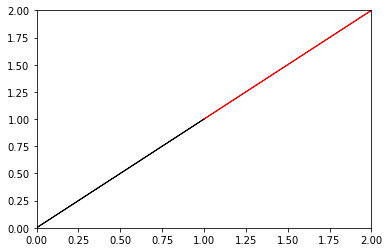

two linearly dependent vectors


In [164]:
plt.ylim(0,2)
plt.xlim(0,2)
plt.arrow(0,0,1,1)
plt.arrow(1,1,2,2, color='red')
plt.show()
print('two linearly dependent vectors')

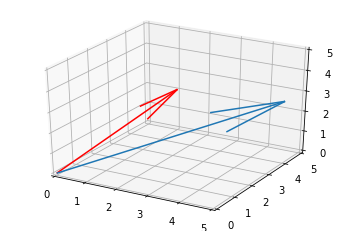

two linearly independent vectors


In [183]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,1,5,2, color='red')
ax.quiver(0,0,0,5,4,3)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
plt.show()
print('two linearly independent vectors')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

> $\mathbb{R}^2$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [223]:
l=np.array([1, 2, 3])
m=np.array([-1, 0, 7])
n=np.array([4, 8, 2])

stack=pd.DataFrame({'l':l, 'm':m, 'n':n})
stack=stack.T
print(stack)

   0  1  2
l  1  2  3
m -1  0  7
n  4  8  2


In [224]:
m=(l+m)
print(m)

[ 0  2 10]


In [225]:
m=m/2
print(m)

[0. 1. 5.]


In [226]:
m=m.astype(int)
print(m)

[0 1 5]


In [227]:
stack=pd.DataFrame({'l':l, 'm':m, 'n':n})
stack=stack.T
print(stack)

   0  1  2
l  1  2  3
m  0  1  5
n  4  8  2


In [228]:
n=n-(4*l)
print(n)

[  0   0 -10]


In [229]:
stack=pd.DataFrame({'l':l, 'm':m, 'n':n})
stack=stack.T
print(stack)

   0  1   2
l  1  2   3
m  0  1   5
n  0  0 -10


In [230]:
n=(-.1*n).astype(int)
print(n)

[0 0 1]


In [232]:
stack=pd.DataFrame({'l':l, 'm':m, 'n':n})
stack=stack.T
print(stack)

   0  1  2
l  1  2  3
m  0  1  5
n  0  0  1


> >   >$\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



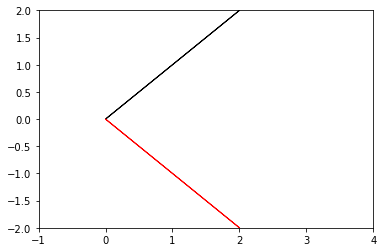

In [248]:
plt.ylim(-2,2)
plt.xlim(-1,4)
plt.arrow(0,0,2,2)
plt.arrow(0,0,2,-2, color='red')
plt.show()
print('')

## 6.2 What does it mean to form a basis?

set of vectors that are linearly independent and span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P=[[1, 2, 3],
   [-1, 0, 7],
   [4, 8, 2]]
np.linalg.matrix_rank(P)

## 7.2 What does the rank of a matrix tell us?

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

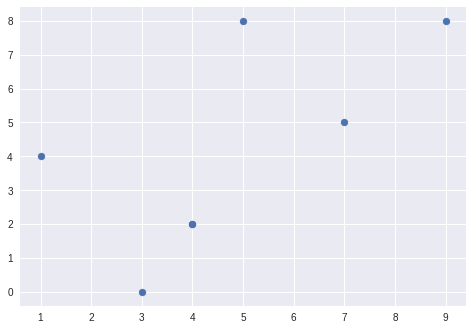

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)